In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_excel('D:\\ThirdYear\\19cse305\\lab7\\lab7_data.xlsx')
df.head()

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


Question 1

In [9]:
# Function to calculate entropy
def entropy(probabilities):
    return -sum([p * np.log2(p) for p in probabilities if p > 0])

In [10]:
def entropy_of_dataset(df, target_col):
    target_values = df[target_col].value_counts(normalize=True)
    return entropy(target_values)

In [11]:
# Function to calculate the entropy of an attribute
def entropy_of_attribute(df, attribute, target_col):
    attribute_values = df[attribute].value_counts(normalize=False)
    total_samples = len(df)
    
    weighted_entropy = 0.0
    for value, count in attribute_values.items():
        subset = df[df[attribute] == value]
        weighted_entropy += (count / total_samples) * entropy_of_dataset(subset, target_col)
    
    return weighted_entropy

In [12]:
# Function to calculate Information Gain
def information_gain(df, attribute, target_col):
    return entropy_of_dataset(df, target_col) - entropy_of_attribute(df, attribute, target_col)

In [13]:
# Function to determine the best feature for the root node
def best_feature_to_split(df, target_col):
    features = df.columns.drop(target_col)
    gains = {feature: information_gain(df, feature, target_col) for feature in features}
    return max(gains, key=gains.get), gains

In [14]:
# Identify the best feature to split on
target_column = 'buys_computer'
best_feature, gains = best_feature_to_split(df, target_column)

print("Best feature to split on:", best_feature)
print("\nInformation Gain for each feature:")
for feature, gain in gains.items():
    print(f"{feature}: {gain:.4f}")

Best feature to split on: age

Information Gain for each feature:
age: 0.2467
income: 0.0292
student: 0.1518
credit_rating: 0.0481


Question 2 & 3

In [16]:
# Function to load and prepare the data
def prepare_data():
    # Encode categorical features using LabelEncoder
    label_encoders = {}
    for column in df.columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    
    return df, label_encoders

In [17]:
# Function to split features and target variable
def split_features_target(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    return X, y

In [18]:
# Function to train the Decision Tree model
def train_decision_tree(X, y):
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

In [19]:
# Function to calculate training accuracy
def get_training_accuracy(model, X, y):
    return model.score(X, y)

In [20]:
# Function to get the depth of the Decision Tree
def get_tree_depth(model):
    return model.get_depth()

In [21]:
# Function to visualize the Decision Tree
def visualize_tree(model, feature_names, class_names):
    plt.figure(figsize=(12,8))
    tree.plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

Training Set Accuracy: 1.0000
Depth of the Tree: 4


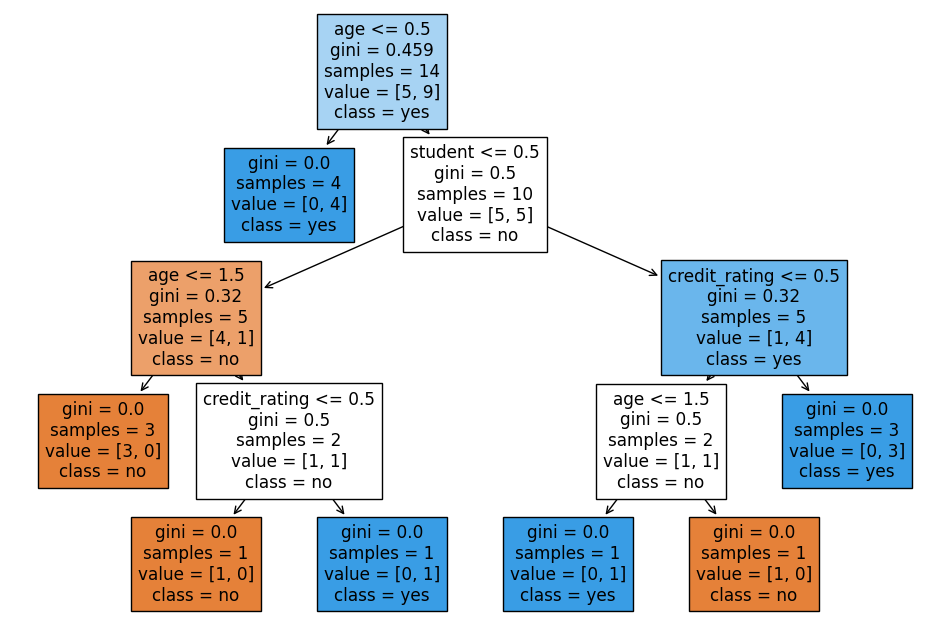

In [22]:
# Main function to execute the complete process
def main():
    # Step 1: Load and prepare data
    df, label_encoders = prepare_data()

    # Step 2: Split the dataset into features and target
    target_column = 'buys_computer'
    X, y = split_features_target(df, target_column)

    # Step 3: Train the Decision Tree
    model = train_decision_tree(X, y)

    # Step 4: Get and print training accuracy
    training_accuracy = get_training_accuracy(model, X, y)
    print(f"Training Set Accuracy: {training_accuracy:.4f}")

    # Step 5: Get and print tree depth
    tree_depth = get_tree_depth(model)
    print(f"Depth of the Tree: {tree_depth}")

    # Step 6: Visualize the tree
    feature_names = X.columns
    class_names = ['no', 'yes']
    visualize_tree(model, feature_names, class_names)

# Run the main function
if __name__ == "__main__":
    main()

Question 4

In [39]:
# Function to load and prepare the data
def load_and_prepare_data():
    # Load data
    df = pd.read_csv('D:\\ThirdYear\\19cse305\\lab7\\D2-Processed-features.csv')

    # Encode categorical columns
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

In [40]:
# Function to split features and target variable
def split_features_target(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    return X, y

In [41]:
# Function to train the Decision Tree model
def train_decision_tree(X, y):
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

In [42]:
# Function to calculate training accuracy
def get_training_accuracy(model, X, y):
    return model.score(X, y)

In [43]:
# Function to get the depth of the Decision Tree
def get_tree_depth(model):
    return model.get_depth()

In [44]:
# Function to visualize the Decision Tree
def visualize_tree(model, feature_names, class_names):
    plt.figure(figsize=(12,8))
    tree.plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

In [45]:
# Main function to execute the process
def main():
    # Step 1: Load and prepare data
    df, label_encoders = load_and_prepare_data()

    # Step 2: Split the dataset into features and target
    target_column = 'believability'
    X, y = split_features_target(df, target_column)

    # Step 3: Split the data into training and testing sets (optional step for better evaluation)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train the Decision Tree
    model = train_decision_tree(X_train, y_train)

    # Step 5: Get and print training accuracy
    training_accuracy = get_training_accuracy(model, X_train, y_train)
    print(f"Training Set Accuracy: {training_accuracy:.4f}")

    # Step 6: Get and print tree depth
    tree_depth = get_tree_depth(model)
    print(f"Depth of the Tree: {tree_depth}")

    # Step 7: Visualize the tree
    feature_names = X.columns
    class_names = [str(cls) for cls in y.unique()]
    visualize_tree(model, feature_names, class_names)

Training Set Accuracy: 1.0000
Depth of the Tree: 25


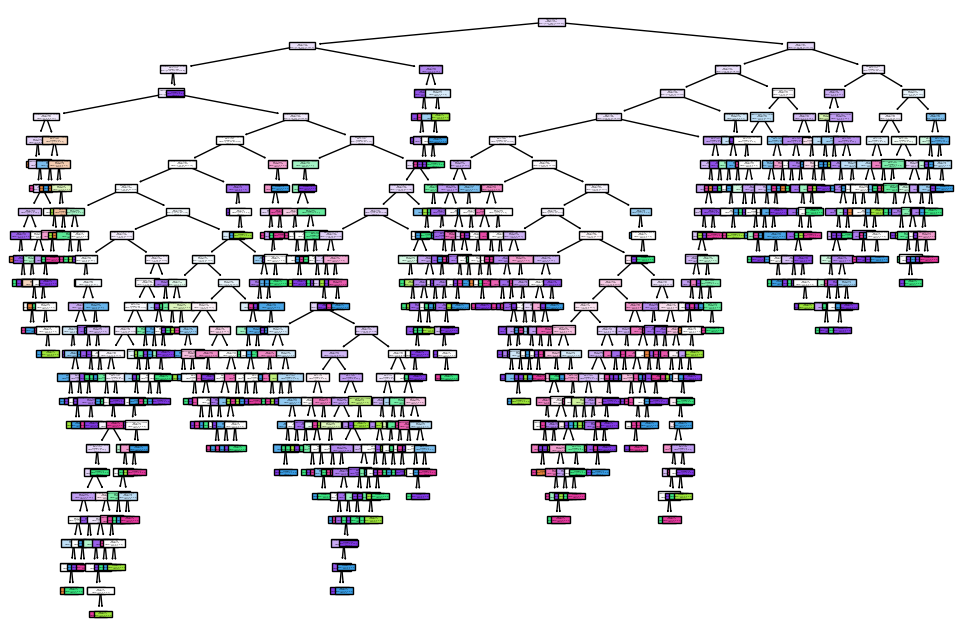

In [48]:
# Run the main function
if __name__ == "__main__":
    main()

Question 5

In [50]:
# Function to train the Decision Tree model
def train_decision_tree_with_max_depth(X, y):
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X, y)
    return model

In [51]:
# Main function to execute the process
def main():
    # Step 1: Load and prepare data
    df, label_encoders = load_and_prepare_data()

    # Step 2: Split the dataset into features and target
    target_column = 'believability'
    X, y = split_features_target(df, target_column)

    # Step 3: Split the data into training and testing sets (optional step for better evaluation)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train the Decision Tree
    model = train_decision_tree_with_max_depth(X_train, y_train)

    # Step 5: Get and print training accuracy
    training_accuracy = get_training_accuracy(model, X_train, y_train)
    print(f"Training Set Accuracy: {training_accuracy:.4f}")

    # Step 6: Get and print tree depth
    tree_depth = get_tree_depth(model)
    print(f"Depth of the Tree: {tree_depth}")

    # Step 7: Visualize the tree
    feature_names = X.columns
    class_names = [str(cls) for cls in y.unique()]
    visualize_tree(model, feature_names, class_names)

Training Set Accuracy: 0.4124
Depth of the Tree: 5


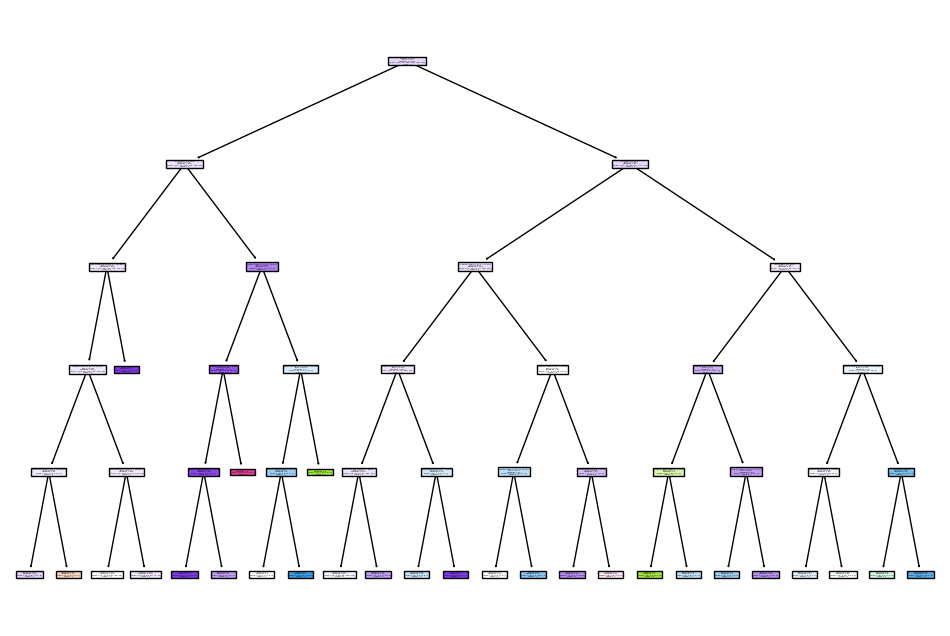

In [52]:
# Run the main function
if __name__ == "__main__":
    main()

Question 6

In [54]:
# Function to train the Decision Tree model
def train_decision_tree_with_criterion_entropy(X, y):
    model = DecisionTreeClassifier(criterion="entropy")
    model.fit(X, y)
    return model

In [55]:
# Main function to execute the process
def main():
    # Step 1: Load and prepare data
    df, label_encoders = load_and_prepare_data()

    # Step 2: Split the dataset into features and target
    target_column = 'believability'
    X, y = split_features_target(df, target_column)

    # Step 3: Split the data into training and testing sets (optional step for better evaluation)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train the Decision Tree
    model = train_decision_tree_with_criterion_entropy(X_train, y_train)

    # Step 5: Get and print training accuracy
    training_accuracy = get_training_accuracy(model, X_train, y_train)
    print(f"Training Set Accuracy: {training_accuracy:.4f}")

    # Step 6: Get and print tree depth
    tree_depth = get_tree_depth(model)
    print(f"Depth of the Tree: {tree_depth}")

    # Step 7: Visualize the tree
    feature_names = X.columns
    class_names = [str(cls) for cls in y.unique()]
    visualize_tree(model, feature_names, class_names)

Training Set Accuracy: 1.0000
Depth of the Tree: 21


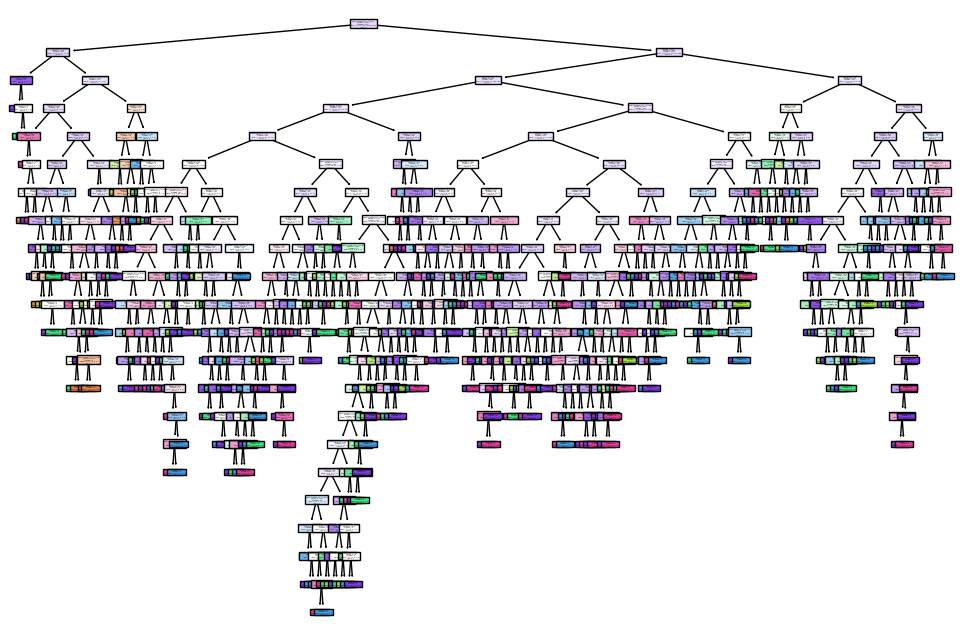

In [56]:
# Run the main function
if __name__ == "__main__":
    main()